In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# .plot(kind='box')
# .boxplot()  - mentioned in course notes

### Notes
#### General
- boxplot(): plot a box plot
- Common Parameters:
    - column - column(s) to plot
    - by - if specified, data will be grouped and a box plot for each group will be plotted
    - vert - if False, plots horizontal boxplots
- Syntax: boxplot(column=['column1', 'column2', ...], by=None, vert=False)
#### General Info
- Purpose:
    - Visualize the distribution of a dataset by displaying the summary statistics (minimum, first quartile, median, third quartile, and maximum).
    - Identify outliers and skewness in the data.
    - Compare distributions across multiple groups.
    Boxplot Source: https://www.kdnuggets.com/2019/11/understanding-boxplots.html

- Description: A box plot consists of a box representing the interquartile range (IQR), a line inside the box representing the median, and whiskers extending from the box to the minimum and maximum values within 1.5 times the IQR. Outliers beyond this range are plotted as individual points.
- Interpretation:
    - Box height represents the IQR (middle 50% of data).
    - Median line divides the box into the 25th and 75th percentiles.
    - Whiskers show the range of non-outlier data points.
    - Outliers are plotted as individual points beyond the whiskers.
#### Advantages
- Compact visualization of key summary statistics.
- Easy to compare distributions across multiple groups.
- Identifies skewness and outliers in the data.

In [3]:
# Only get data analyst jobs 
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the column for plotting
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US['salary_year_avg'].sample(10)

753484     75500.000000
752471    113800.000000
392339     61313.824219
152957    146100.000000
618275     61875.000000
732701    113058.500000
679070     57500.000000
109337     70000.000000
605867    115000.000000
161905     93943.203125
Name: salary_year_avg, dtype: float64

<Axes: >

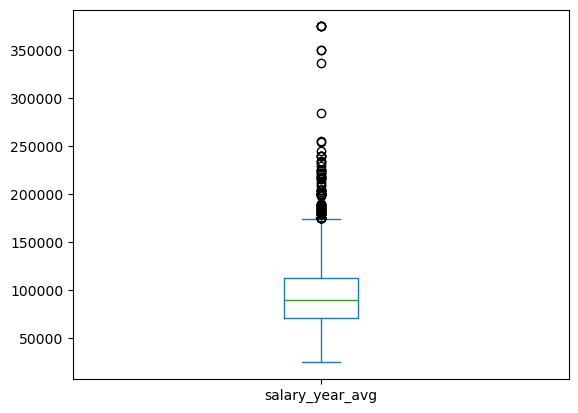

In [4]:
df_DA_US['salary_year_avg'].plot(kind='box')
# Alternatively, you can use matplotlib: plt.boxplot(df_DA_US['salary_year_avg'])

<Axes: >

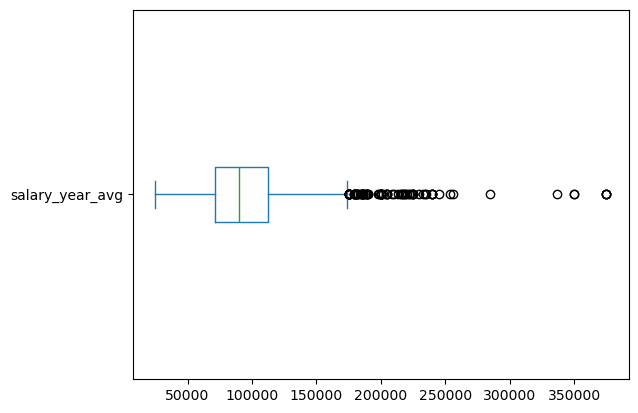

In [5]:
#Prefer it to be horizontal, so
df_DA_US['salary_year_avg'].plot(kind='box', vert=False)

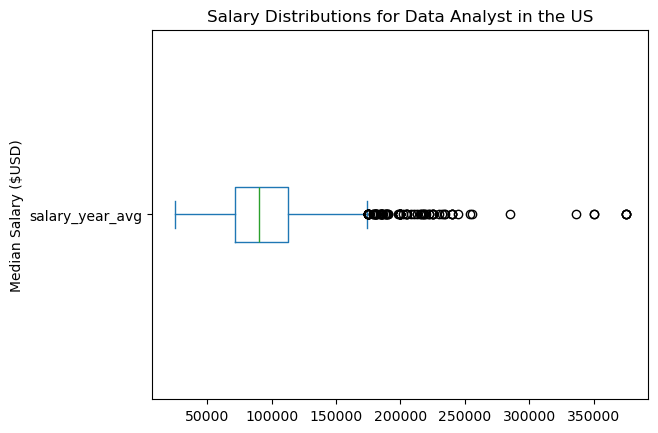

In [6]:
df_DA_US['salary_year_avg'].plot(kind='box', vert=False)

plt.title('Salary Distributions for Data Analyst in the US')
plt.ylabel('Median Salary ($USD)')
plt.show()

### Interpretation
- Median Salary: The green line in the box indicates the median salary, which appears to be around $100,000.
- Interquartile Range (IQR): The box itself spans from approximately **65,000(*lowerquartile*) to**
125,000 (upper quartile). This range represents the middle 50% of the salar*y data.
- Whiskers: The lines extending from the box (whiskers) suggest the range of typical salaries beyond the IQR. The lower whisker extends to about **50,000, *indiccaing the minimum typical salary. The upper whisker goes up to about***
175,000, suggesting the maximum typical salary before considering outliers.
- Outliers: Salaries represented by dots above the upper whisker are considered outliers. There are several outliers ranging up to approximately $350,000, indicating salaries that are unusually high compared to the general distribution.

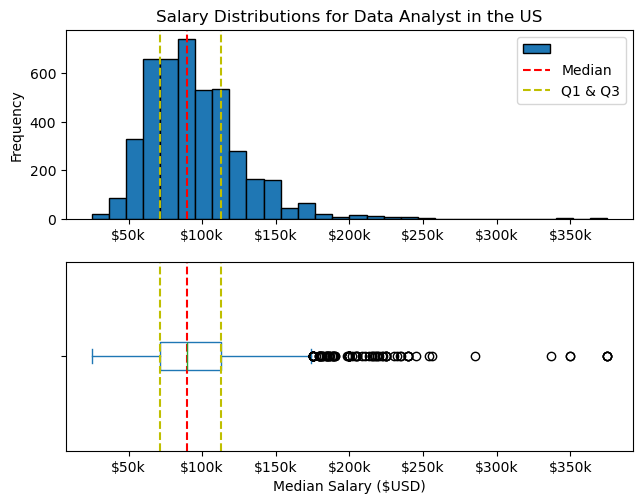

In [7]:
# plot histogram and boxplot for df_DA_US['salary_year_avg'] on same figure

fig, ax = plt.subplots(2, 1)
fig.tight_layout(h_pad=1)

df_DA_US['salary_year_avg'].plot(kind='hist', ax=ax[0], bins=30, edgecolor='black')
ax[0].set_title('Salary Distributions for Data Analyst in the US')
ax[0].set_xlabel('')
ax[0].set_ylabel('Frequency')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: '${0:g}k'.format(x/1000)))
# lines
ax[0].axvline(df_DA_US['salary_year_avg'].median(), color='r', linestyle='--')
ax[0].axvline(df_DA_US['salary_year_avg'].quantile(0.25), color='y', linestyle='--')
ax[0].axvline(df_DA_US['salary_year_avg'].quantile(0.75), color='y', linestyle='--')
ax[0].legend(['', 'Median', 'Q1 & Q3'])


df_DA_US['salary_year_avg'].plot(kind='box', ax=ax[1], vert=False)
ax[1].set_yticklabels('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: '${0:g}k'.format(x/1000)))
# lines
ax[1].axvline(df_DA_US['salary_year_avg'].median(), color='r', linestyle='--')
ax[1].axvline(df_DA_US['salary_year_avg'].quantile(0.25), color='y', linestyle='--')
ax[1].axvline(df_DA_US['salary_year_avg'].quantile(0.75), color='y', linestyle='--')
plt.show()

## Example 2:

In [10]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# filter for the job titles and country
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()

df_US['job_title_short'].value_counts()

job_title_short
Data Analyst      67816
Data Scientist    58830
Data Engineer     35080
Name: count, dtype: int64

In [11]:
df_US['salary_year_avg']

3              NaN
5              NaN
9              NaN
11             NaN
17             NaN
            ...   
785673         NaN
785685         NaN
785692    157500.0
785703         NaN
785705         NaN
Name: salary_year_avg, Length: 161726, dtype: float64

In [12]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# filter for the job titles and country
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()

df_US = df_US.dropna(subset=['salary_year_avg'])

In [13]:
df_US['salary_year_avg']

92        120000.0
100       228222.0
109        89000.0
116       114000.0
146       129500.0
            ...   
785563    136400.0
785624    139216.0
785641    150000.0
785648    221875.0
785692    157500.0
Name: salary_year_avg, Length: 11818, dtype: float64

In [15]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# filter for the job titles and country
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])
 
#Before for job_title in job_titles is what we want to filter for these different series
#Specifically, we want the df_US['salary_year_avg'] column, and we want to filter even furthur by the job_title_short
#We'll specify df_US['job_title_short'] and use the comparsion operater to se if it is equal to this job_title (for job_title in) that we're going to be passing through it
job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]
                                                     #for job_title (new variable we're defining) in job_titles (so we're cycling through the list job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist'])
job_list[0]


109        89000.0
180        90250.0
410       133285.0
988        62623.0
1413       71300.0
            ...   
782637     70000.0
782798    111175.0
783588    125000.0
783866    115000.0
784882     87500.0
Name: salary_year_avg, Length: 4350, dtype: float64

C:\Users\zamia\AppData\Local\Temp\ipykernel_11216\3433996919.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


{'whiskers': [<matplotlib.lines.Line2D at 0x1178f9d5cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1178f9d7150>,
 'boxes': [<matplotlib.lines.Line2D at 0x1178f9d53d0>,
 'medians': [<matplotlib.lines.Line2D at 0x1178f9e0410>,
 'fliers': [<matplotlib.lines.Line2D at 0x1178f9e0d90>,
 'means': []}

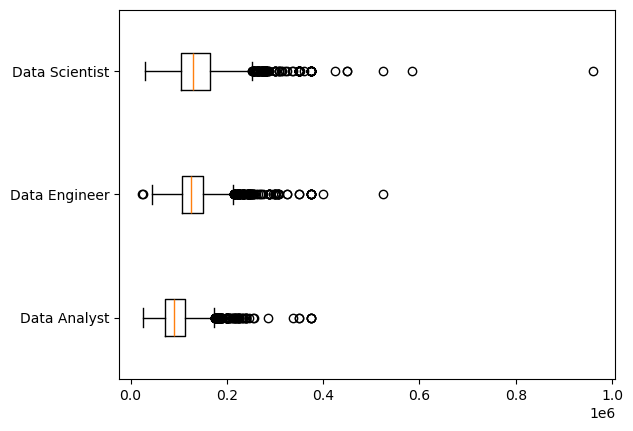

In [16]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False)

C:\Users\zamia\AppData\Local\Temp\ipykernel_11216\2904180978.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


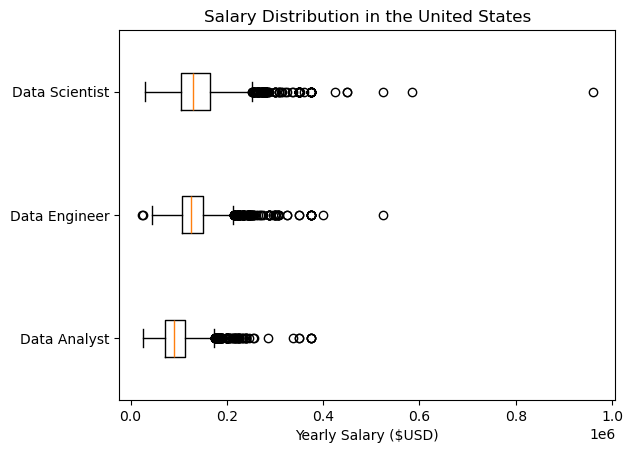

In [17]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]


plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.show()


C:\Users\zamia\AppData\Local\Temp\ipykernel_11216\2057321142.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


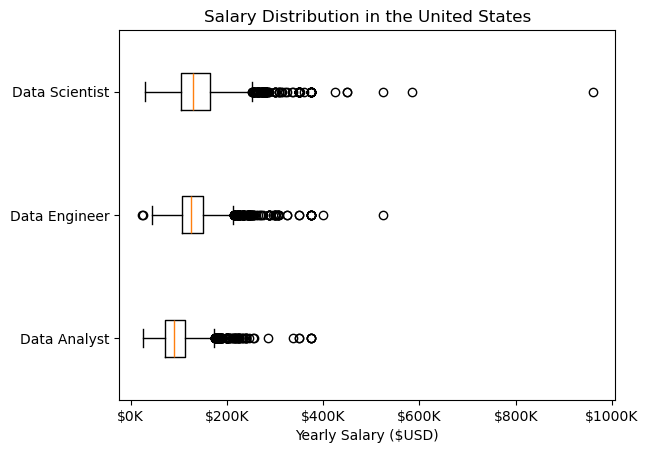

In [19]:
#Want to clean up the x-axis
#Ro do this: we need to, first, get taht axis attribute
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]


plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')

#get plt.gca() ans set it = to ax
ax = plt.gca()
#Now, with out axis, we want to modify the x-axis, specifically, we want to set the major formatter
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
#OR plt.gca().xaxis.set_major_formatter()

plt.show()

C:\Users\zamia\AppData\Local\Temp\ipykernel_11216\220849779.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


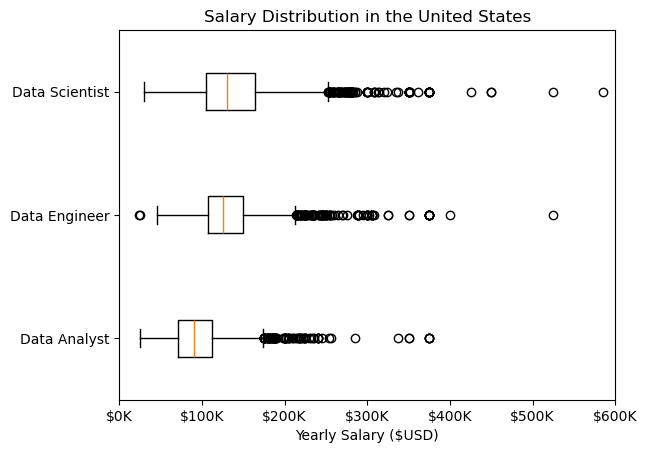

In [22]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]


plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

#We have a major outliner, and we would definitely want to be truful about it
#But, in our case, we would like to look more into this, so we're going to filter the xvalues from 0 to 600000. To loo better into it.
plt.xlim(0, 600000)

plt.show()

### Interpretation
- Individually
    - Data Analyst Salaries: The median salary for data analysts is around **100,000, *wihth thre inter quartile range(IQR) between approximately*** 
    65,000 and **125,000. *Several outliers are observed, indicating salaries as high as***
    350,000.
    - Data Engineer Salaries: Data engineers have a median salary near **200,000. *The IQR extends from about ***
    100,000 to approximately **300,000, *and outliers suggest salaries reaching up to***
    500,000.
    - Data Scientist Salaries: Data scientists show a median salary around **200,000. *The IQR is narrower, rangigng from roughly***
    150,000 to 
    800,000, indicating some exceptionally high salaries in this field.
- Comparison Between the Charts
    - Range and Outliers: Data engineers and data scientists tend to have higher salary ranges and more significant outliers compared to data analysts. This suggests that roles in engineering and science are potentially more lucrative and vary more in compensation.
    - Median and IQR: The median salaries for data engineers and scientists are higher than for analysts. The spread of salaries (IQR) is also broader for engineers, indicating a wider variance in pay within this role.
    - Overall Trend: The progression from analyst to engineer to scientist shows a trend of increasing salary medians and upper ranges, reflecting higher compensation with increased specialization and skills within the data field.

___

## Course Practice Problems

Create a box plot to visualize the distribution of salary_hour_avg for Data Scientist job postings in the United States. Label the x-axis as 'Data Scientist' and the y-axis as 'Hourly Salary ($USD)'.

(2.18.1)

    Use the DataFrames plot() method to create the box plot. Customize the x-axis and y-axis labels using plt.xlabel() and plt.ylabel().

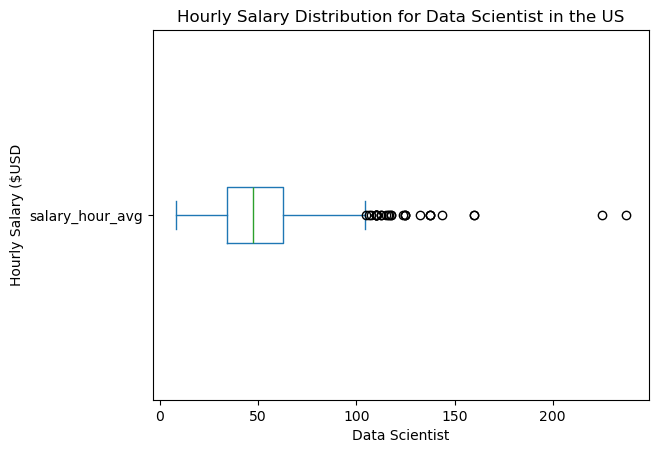

In [26]:
df_DS_US = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].copy()
df_DS_US['salary_hour_avg'].plot(kind='box', vert=False)

plt.xlabel('Data Scientist')
plt.ylabel('Hourly Salary ($USD')
plt.title('Hourly Salary Distribution for Data Scientist in the US')
plt.show()


Create a box plot to compare the distribution of salary_hour_avg for Data Analyst job postings in the United States and Canada.

- Filter a DataFrame to include only 'Data Analyst' roles in these two countries.
- Use list comprehension to create a list of DataFrames for each country.
- Use the plt.boxplot() function to plot this list and specify the labels as countries.
- Set the y-axis limit to 150 and the y-axis as 'Hourly Salary ($USD)'.

Code Needed:
countries = ['United States', 'Canada']

(2.18.2)

    Use the plt.boxplot() function to create the box plot and customize the y-axis labels using  plt.ylabel().

C:\Users\zamia\AppData\Local\Temp\ipykernel_11216\597804889.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(country_list, labels=countries)


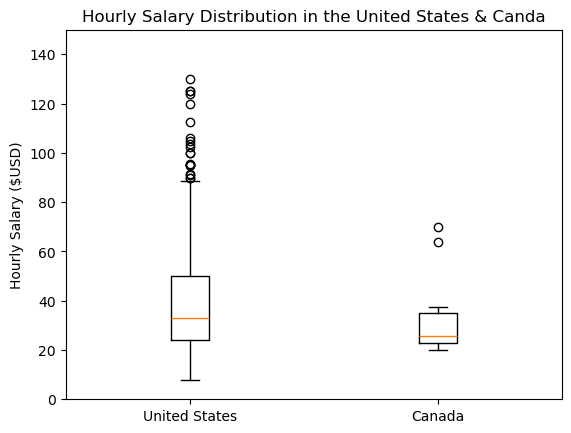

In [34]:
countries = ['United States', 'Canada']
df_da = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'].isin(countries) )].dropna(subset=['salary_hour_avg']).copy()

country_list = [df_da[df_da['job_country'] == country]['salary_hour_avg'] for country in countries]

plt.boxplot(country_list, labels=countries)
plt.title('Hourly Salary Distribution in the United States & Canda')
plt.xlabel('')
plt.ylabel('Hourly Salary ($USD)')
plt.ylim(0, 150)
plt.show()

C:\Users\zamia\AppData\Local\Temp\ipykernel_11216\2905377594.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(country_data, labels=countries)


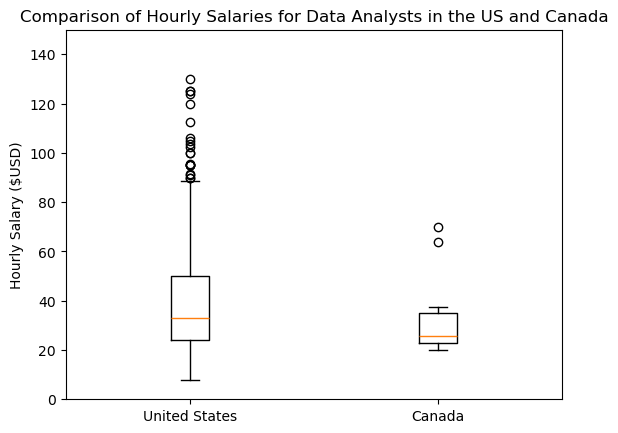

In [33]:
#Course Solution:

# Filter out data
countries = ['United States', 'Canada']
df_filtered = df[(df['job_country'].isin(countries)) & (df['job_title_short'] == 'Data Analyst')].dropna(subset=['salary_hour_avg'])

# Get list of DataFrames for each country
country_data = [df_filtered[df_filtered['job_country'] == country]['salary_hour_avg'] for country in countries]

# Plot chart
plt.boxplot(country_data, labels=countries)
plt.xlabel('')
plt.ylabel('Hourly Salary ($USD)')
plt.ylim(0, 150)
plt.title('Comparison of Hourly Salaries for Data Analysts in the US and Canada')
plt.show()

- Create a box plot to compare the distribution of salary_hour_avg for Data Analyst, Data Engineer, and Data Scientist job postings in Canada.
- 
Label the x-axis as 'Job Title' and format the y-axis to have '$' before the number then label it as 'Hourly Salary (USD)'.
Code Needed:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

(2.18.3)

    - Create a box plot using ax.boxplot() after setting up your figure and axes with plt.subplots().
    - Customize the x-axis and y-axis labels using ax.set_xlabel() and ax.set_ylabel().
    - Apply a custom formatter to the y-axis to format salary values as currency.

C:\Users\zamia\AppData\Local\Temp\ipykernel_11216\1255822660.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(job_list, labels=job_titles)


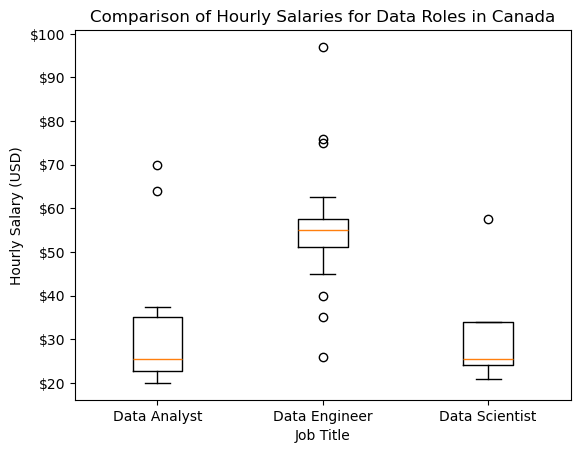

In [35]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
df_ca = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'Canada')].dropna(subset=['salary_hour_avg']).copy()

job_list = [df_ca[df_ca['job_title_short'] == job_title]['salary_hour_avg'] for job_title in job_titles]

fig, ax = plt.subplots()
ax.boxplot(job_list, labels=job_titles)
ax.set_xlabel('Job Title')
ax.set_ylabel('Hourly Salary (USD)')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y)}'))
ax.set_title('Comparison of Hourly Salaries for Data Roles in Canada')
plt.show()

C:\Users\zamia\AppData\Local\Temp\ipykernel_11216\2222270070.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(job_list, labels=job_titles)


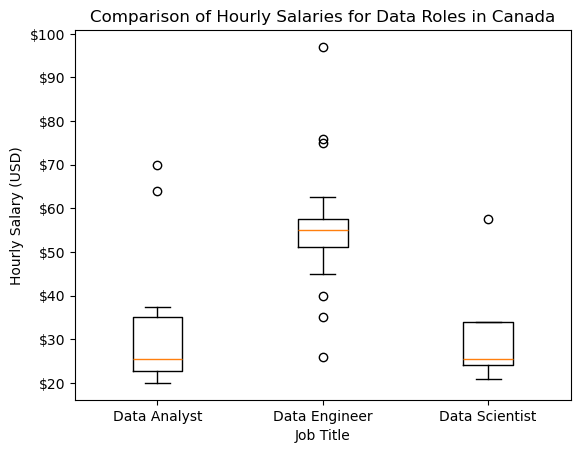

In [36]:
#Course Solution:

# Filter out data
df_Canada = df[df['job_country'] == 'Canada'].dropna(subset=['salary_hour_avg'])
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
job_list = [df_Canada[df_Canada['job_title_short'] == job]['salary_hour_avg'] for job in job_titles]

# Plot charts
fig, ax = plt.subplots()
ax.boxplot(job_list, labels=job_titles)
ax.set_xlabel('Job Title')
ax.set_ylabel('Hourly Salary (USD)')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y)}'))
ax.set_title('Comparison of Hourly Salaries for Data Roles in Canada')
plt.show()